In [79]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
from selenium import webdriver
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver

한화를 형태소 분석기 돌려서 
직접 읽고 분위기 파악 -> 트레인 값 
딥러닝 돌려서 100개를 읽으면 딥러닝 단어를 형태소로 바꿔서 트레인 테스트  

In [80]:
# matplotlib 한글화

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [81]:
url = 'https://novel.naver.com/webnovel/detail?novelId=1051341&volumeNo=1'

In [82]:
res = requests.get(url)
res

<Response [200]>

'<html lang="ko"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="referrer" contents="always">\n<title>001. 회귀, 공작가의 둔재, 회귀하다 : 네이버웹소설</title>\n\n\n\n\n\n<link rel="shortcut icon" type="image/x-icon" href="https://ssl.pstatic.net/static/m/novel/icon_2020/favicon.ico">\n<link rel="icon" sizes="32x32" href="https://ssl.pstatic.net/static/novel/naverwebnovel_32x32.png">\n<link rel="stylesheet" href="/css/novel.css?1642064022000" type="text/css">\n\n\n\n<script type="text/javascript" src="/js/lib/jquery-3.5.1.min.js"></script>\n<script>\n\tvar jQuery = $.noConflict();\n</script>\n\n\n\n<script type="text/javascript">\n\n\nvar gnb_service = "novel";\nvar gnb_logout = encodeURIComponent(location.href);\nvar gnb_template = "gnb_utf8";\nvar gnb_brightness = 1;\n\n\nvar ccsrv = \'cc.naver.com\';\nvar nsc = "novel.nsc";\nvar nclk_evt 
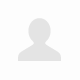
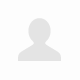

In [83]:
from selenium import webdriver
driver = webdriver.Chrome()
driver.get(url)
html = driver.page_source
html

In [84]:
soup = BeautifulSoup(html, 'html.parser')

In [85]:
path = '#content > div.section_area_viewer > div.viewer_container.dotum > div > p:nth-child(2)'

In [86]:
novel = soup.select(path)

In [87]:
novel

[<p>
 
 　
 “가주님, 대륙 최고의 명검이 완성되었습니다.”
 
 
 외팔인 빈이 한쪽 무릎을 꿇은 채 검을 받들었다.
 
 주변에는 빈을 둘러싼 사람들이 그를 지켜봤다.
 
 다들 대륙에서 내로라하는 인물들이었다.
 
 그중에서도 빈의 눈앞에 있는 ‘친위대장’ 헬던 그랜더가 눈에 띄었다.
 
 한쪽 눈에 기다란 상처와 거대한 체구.
 
 마치 거대한 곰이 서 있는 듯한 모습이었다.
 
 헬던은 빈이 건넨 장검을 들어 올렸다.
 
 손쉽게 들어 올리는 모습에 거대한 장검의 무게가 가벼워 보일 지경이었다.
 
 헬던은 눈살을 찌푸리며, 검을 유심히 바라봤다.
 
 
 “훌륭하군.”
 
 
 헬던의 입에서 감탄이 절로 나왔다.
 
 검의 날인 검신. 손잡이 부분인 검병.
 
 뭐 하나 나무랄 데 없는 최상의 명검이었다.
 
 헬던은 흐뭇한 표정으로 고개를 끄덕였다.
 
 
 “외팔인 데도 불구하고 이런 명검을 만들어 내다니……. 과연 가나 대륙 최고의 대장장이라는 별칭이 아깝지가 않군그래.”
 
 
 흐뭇한 미소를 지은 빈이 헬던을 향해 고개를 조아렸다.
 
 
 “감사합니다, 가주님. 다음에는 이보다 더 뛰어난 검을 바쳐 보이겠습니다.”
 
 “하하하하. 더 뛰어난 검이라.”
 
 
 헬던은 환희 웃으며, 빈에게 다가갔다.
 
 그런데……
 
 푸욱!
 
 빈이 피를 토하며, 배를 부여잡았다.
 
 빈의 표정은 조금 전과는 상반되게 얼떨떨했다.
 
 명검 ‘루미나레’가 자신의 배를 관통하고 있었으니 말이다.
 
 살이 찢기는 고통에 차마 소리조차 나오지 않았다.
 
 
 “…….”
 
 
 입가에 피를 흘리던 빈은 억지로 목소리를 쥐어짰다.
 
 
 “어, 어째서…?”
 
 
 빈의 물음에 헬던이 입꼬리를 올렸다.
 
 
 “성능 한번 죽여 주는군. 이런 명검을 한 자루 더 만들면 루미나레가 섭섭하지 않겠나? 이 검은 널리 알려 줄 테니 편히 눈감게나. ‘바스콘가’의 막내아들이여.”
 
 
 그 순간 빈은 철퇴로 뒤통수를 맞은 기분이었다.
 
 
 ‘내 

In [88]:
final = novel[0].text.replace("\n",'').replace("\u3000",'')
final

'“가주님, 대륙 최고의 명검이 완성되었습니다.”외팔인 빈이 한쪽 무릎을 꿇은 채 검을 받들었다.주변에는 빈을 둘러싼 사람들이 그를 지켜봤다.다들 대륙에서 내로라하는 인물들이었다.그중에서도 빈의 눈앞에 있는 ‘친위대장’ 헬던 그랜더가 눈에 띄었다.한쪽 눈에 기다란 상처와 거대한 체구.마치 거대한 곰이 서 있는 듯한 모습이었다.헬던은 빈이 건넨 장검을 들어 올렸다.손쉽게 들어 올리는 모습에 거대한 장검의 무게가 가벼워 보일 지경이었다.헬던은 눈살을 찌푸리며, 검을 유심히 바라봤다.“훌륭하군.”헬던의 입에서 감탄이 절로 나왔다.검의 날인 검신. 손잡이 부분인 검병.뭐 하나 나무랄 데 없는 최상의 명검이었다.헬던은 흐뭇한 표정으로 고개를 끄덕였다.“외팔인 데도 불구하고 이런 명검을 만들어 내다니……. 과연 가나 대륙 최고의 대장장이라는 별칭이 아깝지가 않군그래.”흐뭇한 미소를 지은 빈이 헬던을 향해 고개를 조아렸다.“감사합니다, 가주님. 다음에는 이보다 더 뛰어난 검을 바쳐 보이겠습니다.”“하하하하. 더 뛰어난 검이라.”헬던은 환희 웃으며, 빈에게 다가갔다.그런데……푸욱!빈이 피를 토하며, 배를 부여잡았다.빈의 표정은 조금 전과는 상반되게 얼떨떨했다.명검 ‘루미나레’가 자신의 배를 관통하고 있었으니 말이다.살이 찢기는 고통에 차마 소리조차 나오지 않았다.“…….”입가에 피를 흘리던 빈은 억지로 목소리를 쥐어짰다.“어, 어째서…?”빈의 물음에 헬던이 입꼬리를 올렸다.“성능 한번 죽여 주는군. 이런 명검을 한 자루 더 만들면 루미나레가 섭섭하지 않겠나? 이 검은 널리 알려 줄 테니 편히 눈감게나. ‘바스콘가’의 막내아들이여.”그 순간 빈은 철퇴로 뒤통수를 맞은 기분이었다.‘내 정체를…… 알고 있었던 건가?’그랬다.빈은 바스콘가의 막내아들로 그랜더가와는 적대시하는 사이였다.명검을 바친 건 헬던의 신임을 얻어, 그에게 죽은 어머니의 복수를 하기 위함이었다. 빈의 눈살이 찌푸려졌다.‘이런 젠장……!’빈을 둘러싼 사람들이 그에게 달려들기 시작했다.가나 제국 최고 정예인 ‘가나

In [89]:
fi = okt.morphs(final)
fi

['“',
 '가주',
 '님',
 ',',
 '대륙',
 '최고',
 '의',
 '명검',
 '이',
 '완성',
 '되었습니다',
 '.',
 '”',
 '외팔',
 '인',
 '빈',
 '이',
 '한쪽',
 '무릎',
 '을',
 '꿇은',
 '채',
 '검',
 '을',
 '받',
 '들었다',
 '.',
 '주변',
 '에는',
 '빈',
 '을',
 '둘러싼',
 '사람',
 '들',
 '이',
 '그',
 '를',
 '지켜봤다',
 '.',
 '다',
 '들',
 '대륙',
 '에서',
 '내',
 '로라',
 '하',
 '는',
 '인물',
 '들이었다',
 '.',
 '그',
 '중',
 '에서도',
 '빈',
 '의',
 '눈앞',
 '에',
 '있는',
 '‘',
 '친위대',
 '장',
 '’',
 '헬던',
 '그',
 '랜더',
 '가',
 '눈',
 '에',
 '띄었다',
 '.',
 '한쪽',
 '눈',
 '에',
 '기다란',
 '상처',
 '와',
 '거대한',
 '체구',
 '.',
 '마치',
 '거대한',
 '곰',
 '이',
 '서',
 '있는',
 '듯',
 '한',
 '모습',
 '이었다',
 '.',
 '헬던',
 '은',
 '빈',
 '이',
 '건넨',
 '장검',
 '을',
 '들어',
 '올렸다',
 '.',
 '손쉽게',
 '들어',
 '올리는',
 '모습',
 '에',
 '거대한',
 '장검',
 '의',
 '무게',
 '가',
 '가벼워',
 '보일',
 '지경',
 '이었다',
 '.',
 '헬던',
 '은',
 '눈살',
 '을',
 '찌푸리며',
 ',',
 '검',
 '을',
 '유심',
 '히',
 '바라봤다',
 '.',
 '“',
 '훌륭하군',
 '.',
 '”',
 '헬던',
 '의',
 '입',
 '에서',
 '감탄',
 '이',
 '절로',
 '나왔다',
 '.',
 '검',
 '의',
 '날인',
 '검신',
 '.',
 '손잡이',
 '부분',
 '인',
 '검병',
 '.',


In [62]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [91]:
print('단어 토큰화1 :',word_tokenize(final))

단어 토큰화1 : ['“', '가주님', ',', '대륙', '최고의', '명검이', '완성되었습니다.', '”', '외팔인', '빈이', '한쪽', '무릎을', '꿇은', '채', '검을', '받들었다.주변에는', '빈을', '둘러싼', '사람들이', '그를', '지켜봤다.다들', '대륙에서', '내로라하는', '인물들이었다.그중에서도', '빈의', '눈앞에', '있는', '‘', '친위대장', '’', '헬던', '그랜더가', '눈에', '띄었다.한쪽', '눈에', '기다란', '상처와', '거대한', '체구.마치', '거대한', '곰이', '서', '있는', '듯한', '모습이었다.헬던은', '빈이', '건넨', '장검을', '들어', '올렸다.손쉽게', '들어', '올리는', '모습에', '거대한', '장검의', '무게가', '가벼워', '보일', '지경이었다.헬던은', '눈살을', '찌푸리며', ',', '검을', '유심히', '바라봤다.', '“', '훌륭하군.', '”', '헬던의', '입에서', '감탄이', '절로', '나왔다.검의', '날인', '검신', '.', '손잡이', '부분인', '검병.뭐', '하나', '나무랄', '데', '없는', '최상의', '명검이었다.헬던은', '흐뭇한', '표정으로', '고개를', '끄덕였다.', '“', '외팔인', '데도', '불구하고', '이런', '명검을', '만들어', '내다니……', '.', '과연', '가나', '대륙', '최고의', '대장장이라는', '별칭이', '아깝지가', '않군그래.', '”', '흐뭇한', '미소를', '지은', '빈이', '헬던을', '향해', '고개를', '조아렸다.', '“', '감사합니다', ',', '가주님', '.', '다음에는', '이보다', '더', '뛰어난', '검을', '바쳐', '보이겠습니다.', '”', '“', '하하하하', '.', '더', '뛰어난', '검이라.', '”', '헬던은', '환희', '웃으며', ',', '빈에게', '다가갔다.그

In [93]:
print('단어 토큰화2 :',WordPunctTokenizer().tokenize(final))

단어 토큰화2 : ['“', '가주님', ',', '대륙', '최고의', '명검이', '완성되었습니다', '.”', '외팔인', '빈이', '한쪽', '무릎을', '꿇은', '채', '검을', '받들었다', '.', '주변에는', '빈을', '둘러싼', '사람들이', '그를', '지켜봤다', '.', '다들', '대륙에서', '내로라하는', '인물들이었다', '.', '그중에서도', '빈의', '눈앞에', '있는', '‘', '친위대장', '’', '헬던', '그랜더가', '눈에', '띄었다', '.', '한쪽', '눈에', '기다란', '상처와', '거대한', '체구', '.', '마치', '거대한', '곰이', '서', '있는', '듯한', '모습이었다', '.', '헬던은', '빈이', '건넨', '장검을', '들어', '올렸다', '.', '손쉽게', '들어', '올리는', '모습에', '거대한', '장검의', '무게가', '가벼워', '보일', '지경이었다', '.', '헬던은', '눈살을', '찌푸리며', ',', '검을', '유심히', '바라봤다', '.“', '훌륭하군', '.”', '헬던의', '입에서', '감탄이', '절로', '나왔다', '.', '검의', '날인', '검신', '.', '손잡이', '부분인', '검병', '.', '뭐', '하나', '나무랄', '데', '없는', '최상의', '명검이었다', '.', '헬던은', '흐뭇한', '표정으로', '고개를', '끄덕였다', '.“', '외팔인', '데도', '불구하고', '이런', '명검을', '만들어', '내다니', '…….', '과연', '가나', '대륙', '최고의', '대장장이라는', '별칭이', '아깝지가', '않군그래', '.”', '흐뭇한', '미소를', '지은', '빈이', '헬던을', '향해', '고개를', '조아렸다', '.“', '감사합니다', ',', '가주님', '.', '다음에는', '이보다', '더', '뛰어난', '검을', '바쳐', '보이겠습니다', 

In [92]:
print('단어 토큰화3 :',text_to_word_sequence(final))

단어 토큰화3 : ['“가주님', '대륙', '최고의', '명검이', '완성되었습니다', '”외팔인', '빈이', '한쪽', '무릎을', '꿇은', '채', '검을', '받들었다', '주변에는', '빈을', '둘러싼', '사람들이', '그를', '지켜봤다', '다들', '대륙에서', '내로라하는', '인물들이었다', '그중에서도', '빈의', '눈앞에', '있는', '‘친위대장’', '헬던', '그랜더가', '눈에', '띄었다', '한쪽', '눈에', '기다란', '상처와', '거대한', '체구', '마치', '거대한', '곰이', '서', '있는', '듯한', '모습이었다', '헬던은', '빈이', '건넨', '장검을', '들어', '올렸다', '손쉽게', '들어', '올리는', '모습에', '거대한', '장검의', '무게가', '가벼워', '보일', '지경이었다', '헬던은', '눈살을', '찌푸리며', '검을', '유심히', '바라봤다', '“훌륭하군', '”헬던의', '입에서', '감탄이', '절로', '나왔다', '검의', '날인', '검신', '손잡이', '부분인', '검병', '뭐', '하나', '나무랄', '데', '없는', '최상의', '명검이었다', '헬던은', '흐뭇한', '표정으로', '고개를', '끄덕였다', '“외팔인', '데도', '불구하고', '이런', '명검을', '만들어', '내다니……', '과연', '가나', '대륙', '최고의', '대장장이라는', '별칭이', '아깝지가', '않군그래', '”흐뭇한', '미소를', '지은', '빈이', '헬던을', '향해', '고개를', '조아렸다', '“감사합니다', '가주님', '다음에는', '이보다', '더', '뛰어난', '검을', '바쳐', '보이겠습니다', '”“하하하하', '더', '뛰어난', '검이라', '”헬던은', '환희', '웃으며', '빈에게', '다가갔다', '그런데……푸욱', '빈이', '피를', '토하며', '배를', '부여잡았다', '빈의', '표정은', '조금'

In [71]:
import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [76]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", filename="2016-10-20.txt")

('2016-10-20.txt', <http.client.HTTPMessage at 0x1f2102dc970>)

In [77]:
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)

30091

In [78]:
i = 0
for document in corpus:
  if len(document) > 0:
    print(document)
    i = i+1
  if i == 3:
    break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

In [ ]:
tokenizer = Tokenizer().
tok = tokenizer.tokenize(final)
tok

In [11]:
from konlpy.tag import Okt, Komoran, Kkma, Hannanum

okt = Okt()
# mecab = Mecab()
kom = Komoran()
kkma = Kkma()
han = Hannanum()

In [58]:
tokenizer = Tokenizer().
tok = tokenizer.tokenize(final)
tok

AttributeError: 'Tokenizer' object has no attribute 'tokenize'

In [204]:
pos = okt.morphs(text)
pos

['\n',
 '가격',
 '이',
 '싸다',
 '\n',
 '가까이',
 '사귀어',
 '\n',
 '가까이',
 '하다',
 '\n',
 '가다듬어',
 '\n',
 '가다듬어',
 '수습',
 '하는',
 '\n',
 '가다듬어',
 '수습',
 '하다',
 '\n',
 '가다듬어',
 '정',
 '하다',
 '\n',
 '가당',
 '히',
 '\n',
 '가뜬',
 '하게',
 '\n',
 '가라앉혀',
 '바로잡다',
 '\n',
 '가르치며',
 '\n',
 '가르침',
 '\n',
 '가벼운',
 '마음',
 '으로',
 '\n',
 '가볍게',
 '웃다',
 '\n',
 '가볍고',
 '\n',
 '가볍고',
 '보드랍게',
 '\n',
 '가분가분',
 '\n',
 '가분히',
 '\n',
 '가뿐가뿐',
 '\n',
 '가뿐가뿐',
 '하다',
 '\n',
 '가뿐가뿐히',
 '\n',
 '가뿐하게',
 '\n',
 '가뿐하다',
 '\n',
 '가뿐한',
 '\n',
 '가뿐한',
 '느낌',
 '\n',
 '가뿐한',
 '느낌',
 '이',
 '\n',
 '가뿐히',
 '\n',
 '가장',
 '중요한',
 '\n',
 '가지런하게',
 '하는',
 '\n',
 '가지런하게',
 '하다',
 '\n',
 '가지런하다',
 '\n',
 '가치',
 '\n',
 '가치',
 '가',
 '\n',
 '가치',
 '있는',
 '\n',
 '각별',
 '나다',
 '\n',
 '각별',
 '하다',
 '\n',
 '간직',
 '하다',
 '\n',
 '감각',
 '적',
 '이다',
 '\n',
 '감당',
 '하다',
 '\n',
 '감동',
 '시킬',
 '\n',
 '감동',
 '시킬',
 '만',
 '한',
 '\n',
 '감모',
 '\n',
 '감싸고',
 '\n',
 '감정',
 '이',
 '북받쳐',
 '\n',
 '강렬하게',
 '\n',
 '강세',
 '\n',
 '강인하다',
 '\n',
 '강하게',
 '\n',
 '강하게

In [212]:
pos_df = pd.DataFrame(data = pos, columns = ['morphs'])
pos_df

,morphs
0,\n
1,가격
2,이
3,싸다
4,\n
...,...
15369,승리
15370,하다
15371,\n
15372,유명하다


In [213]:
pos_df.duplicated(subset=['morphs']).sum()

12520

In [214]:
pos_df.drop_duplicates(['morphs'], keep='first', inplace=True)

In [215]:
pos_df

,morphs
0,\n
1,가격
2,이
3,싸다
5,가까이
...,...
15356,상위
15359,권
15361,안정감
15367,승리


In [216]:
from pandas.core.internals.construction import dataclasses_to_dicts
st_df = pd.read_csv('./stopwords-ko.txt', header=None)
st_list = [st[0] for st in st_df.values]

def remove_stwords_oneletter(doc):
  doc = okt.morphs(doc)
  doc = [t for t in doc if t not in st_list]
  doc = [t for t in doc if len(t) > 1]
  doc = ' '.join(doc)
  return doc

In [217]:
pos_df['morphs'] = pos_df['morphs'].apply(remove_stwords_oneletter)

In [218]:
pos_df = pos_df.replace('',np.nan)
pos_df

,morphs
0,NaN
1,가격
2,NaN
3,싸다
5,가까이
...,...
15356,상위
15359,NaN
15361,안정감
15367,승리


In [219]:
pos_df = pos_df.dropna(how='any')
pos_df

,morphs
1,가격
3,싸다
5,가까이
6,사귀어
9,하다
...,...
15354,득점
15356,상위
15361,안정감
15367,승리


In [220]:
pos_df.isnull().sum()

morphs    0
dtype: int64

In [221]:
pos_df = pos_df.remove_index()

AttributeError: 'DataFrame' object has no attribute 'remove_index'

In [230]:
pos_df.to_excel('posemo.xlsx',index=False)

In [224]:
pos_df.head(60)

,morphs
1,가격
3,싸다
5,가까이
6,사귀어
9,하다
11,가다듬어
14,수습
15,하는
25,가당
28,가뜬


In [229]:
pos_df[60:120]

,morphs
159,갸륵
167,갸름하다
169,거리
171,없이
173,거짓
174,없다
179,거침
182,거침이
183,없는
185,걱정


In [234]:
pos_emo = pd.read_excel('./posemo.xlsx',index_col=0)
pos_emo

""
morphs
가격
싸다
가까이
사귀어
하다
...
득점
상위
안정감


In [202]:
pos_df.columns = ['index','none','morphs']

ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

In [236]:
emo = pd.read_excel("./감성.xlsx",index_col=0)
emo

,슬픔,분노,기쁨,긴장감,무서운,증오,차분히,섹시,브릿락,설렘,몽환
가련하다,1,0,0,0,0,0,0,0,0,0,0
가슴 아프다,1,0,0,0,0,0,0,0,0,0,0
가슴앓이,1,0,0,0,0,0,0,0,0,0,0
가엾다,1,0,0,0,0,0,0,0,0,0,0
각박하다,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
골치아프다,0,0,0,0,0,0,0,0,1,0,0
기진맥진하다,0,0,0,0,0,0,0,0,1,0,0
아야,0,0,0,0,0,0,0,0,1,0,0
아프다,0,0,0,0,0,0,0,0,1,0,0


In [238]:
pos_cat = pd.concat([emo,pos_emo])
pos_cat

,슬픔,분노,기쁨,긴장감,무서운,증오,차분히,섹시,브릿락,설렘,몽환
가련하다,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
가슴 아프다,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
가슴앓이,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
가엾다,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
각박하다,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
득점,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
상위,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
안정감,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
승리,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
pos_cat.to_excel('pos_cat.xlsx')

In [201]:
emo.columns

Index(['Unnamed: 0', '슬픔', '분노', '기쁨', '긴장감', '무서운', '증오', '차분히', '섹시', '브릿락',
       '설렘', '몽환'],
      dtype='object')

In [ ]:
'슬픔'
'분노'
'기쁨'
'긴장감' 놀람
'무서운'공포
'증오' 혐오
'차분히' 지루함
'섹시' 흥미
'브릿락' 통증 
'설렘'
'몽환'

In [31]:
poscat = pd.read_excel("./pos_cat 1(1).xlsx")
poscat

,Unnamed: 0,슬픔,분노,기쁨,긴장감,무서운,증오,차분히,섹시,브릿락,설렘,몽환
0,가련하다,1,0,0,0,0,0,0,0,0,0.0,0
1,가슴 아프다,1,0,0,0,0,0,0,0,0,0.0,0
2,가슴앓이,1,0,0,0,0,0,0,0,0,0.0,0
3,가엾다,1,0,0,0,0,0,0,0,0,0.0,0
4,각박하다,1,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2998,득점,0,0,1,0,0,0,0,0,0,0.0,0
2999,상위,0,0,1,0,0,0,0,0,0,0.0,0
3000,안정감,0,0,0,0,0,0,1,0,0,0.0,0
3001,승리,0,0,1,0,0,0,0,0,0,0.0,0


In [32]:
poscat.replace(" ", np.nan)

,Unnamed: 0,슬픔,분노,기쁨,긴장감,무서운,증오,차분히,섹시,브릿락,설렘,몽환
0,가련하다,1,0,0,0,0,0,0,0,0,0.0,0
1,가슴 아프다,1,0,0,0,0,0,0,0,0,0.0,0
2,가슴앓이,1,0,0,0,0,0,0,0,0,0.0,0
3,가엾다,1,0,0,0,0,0,0,0,0,0.0,0
4,각박하다,1,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2998,득점,0,0,1,0,0,0,0,0,0,0.0,0
2999,상위,0,0,1,0,0,0,0,0,0,0.0,0
3000,안정감,0,0,0,0,0,0,1,0,0,0.0,0
3001,승리,0,0,1,0,0,0,0,0,0,0.0,0


In [33]:
poscat.isnull().sum()

Unnamed: 0    1004
슬픔               0
분노               0
기쁨               0
긴장감              0
무서운              0
증오               0
차분히              0
섹시               0
브릿락              0
설렘               2
몽환               0
dtype: int64

In [38]:
poscat[1950:]

,Unnamed: 0,슬픔,분노,기쁨,긴장감,무서운,증오,차분히,섹시,브릿락,설렘,몽환
2935,활달,0,0,1,0,0,0,0,0,0,0.0,0
2936,행복감,0,0,1,0,0,0,0,0,0,1.0,0
2937,행복스럽다,0,0,1,0,0,0,0,0,0,1.0,0
2938,행복하다,0,0,1,0,0,0,0,0,0,1.0,0
2939,행복한,0,0,1,0,0,0,0,0,0,1.0,0
2943,현명한,0,0,1,0,0,0,0,0,0,0.0,0
2947,화기,0,0,0,0,0,0,0,0,0,1.0,0
2948,애애,0,0,0,0,0,0,0,0,0,1.0,0
2949,화사하다,0,0,0,0,0,0,0,0,0,0.0,0
2950,화창한,0,0,0,0,0,0,0,0,0,1.0,0


In [36]:
poscat = poscat.dropna(how='any')
poscat

,Unnamed: 0,슬픔,분노,기쁨,긴장감,무서운,증오,차분히,섹시,브릿락,설렘,몽환
0,가련하다,1,0,0,0,0,0,0,0,0,0.0,0
1,가슴 아프다,1,0,0,0,0,0,0,0,0,0.0,0
2,가슴앓이,1,0,0,0,0,0,0,0,0,0.0,0
3,가엾다,1,0,0,0,0,0,0,0,0,0.0,0
4,각박하다,1,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2998,득점,0,0,1,0,0,0,0,0,0,0.0,0
2999,상위,0,0,1,0,0,0,0,0,0,0.0,0
3000,안정감,0,0,0,0,0,0,1,0,0,0.0,0
3001,승리,0,0,1,0,0,0,0,0,0,0.0,0


In [43]:
poscat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 3002
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1997 non-null   object 
 1   슬픔          1997 non-null   int64  
 2   분노          1997 non-null   int64  
 3   기쁨          1997 non-null   int64  
 4   긴장감         1997 non-null   int64  
 5   무서운         1997 non-null   int64  
 6   증오          1997 non-null   int64  
 7   차분히         1997 non-null   int64  
 8   섹시          1997 non-null   int64  
 9   브릿락         1997 non-null   int64  
 10  설렘          1997 non-null   float64
 11  몽환          1997 non-null   int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 202.8+ KB


In [41]:
poscat.to_excel('posemo.xlsx',index=False)

In [27]:
posemo = pd.read_excel('./posemo.xlsx')
posemo

,Unnamed: 0,슬픔,분노,기쁨,긴장감,무서운,증오,차분히,섹시,브릿락,설렘,몽환
0,가련하다,1,0,0,0,0,0,0,0,0,0,0
1,가슴 아프다,1,0,0,0,0,0,0,0,0,0,0
2,가슴앓이,1,0,0,0,0,0,0,0,0,0,0
3,가엾다,1,0,0,0,0,0,0,0,0,0,0
4,각박하다,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,득점,0,0,1,0,0,0,0,0,0,0,0
1993,상위,0,0,1,0,0,0,0,0,0,0,0
1994,안정감,0,0,0,0,0,0,1,0,0,0,0
1995,승리,0,0,1,0,0,0,0,0,0,0,0


In [31]:
posemo = posemo.rename(columns={'Unnamed: 0':'morphs'})
posemo

,morphs,슬픔,분노,기쁨,긴장감,무서운,증오,차분히,섹시,브릿락,설렘,몽환
0,가련하다,1,0,0,0,0,0,0,0,0,0,0
1,가슴 아프다,1,0,0,0,0,0,0,0,0,0,0
2,가슴앓이,1,0,0,0,0,0,0,0,0,0,0
3,가엾다,1,0,0,0,0,0,0,0,0,0,0
4,각박하다,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,득점,0,0,1,0,0,0,0,0,0,0,0
1993,상위,0,0,1,0,0,0,0,0,0,0,0
1994,안정감,0,0,0,0,0,0,1,0,0,0,0
1995,승리,0,0,1,0,0,0,0,0,0,0,0


In [36]:
okt.nouns(final)

['가주',
 '대륙',
 '최고',
 '명검',
 '완성',
 '외팔',
 '빈',
 '한쪽',
 '무릎',
 '채',
 '검',
 '주변',
 '빈',
 '사람',
 '그',
 '대륙',
 '로라',
 '인물',
 '중',
 '빈',
 '눈앞',
 '친위대',
 '헬던',
 '랜더',
 '눈',
 '한쪽',
 '눈',
 '상처',
 '체구',
 '마치',
 '곰',
 '듯',
 '모습',
 '헬던',
 '빈',
 '장검',
 '모습',
 '장검',
 '무게',
 '지경',
 '헬던',
 '눈살',
 '검',
 '유심',
 '헬던',
 '입',
 '감탄',
 '절로',
 '검',
 '날인',
 '손잡이',
 '부분',
 '검병',
 '뭐',
 '하나',
 '데',
 '최상',
 '명검',
 '헬던',
 '표정',
 '고개',
 '외팔',
 '불구',
 '명검',
 '과연',
 '가나',
 '대륙',
 '최고',
 '대장장이',
 '별칭',
 '미소',
 '지은',
 '빈',
 '헬던',
 '향',
 '고개',
 '가주',
 '다음',
 '이보',
 '더',
 '검',
 '더',
 '검',
 '헬던',
 '환희',
 '빈',
 '푸욱',
 '빈',
 '피',
 '토',
 '배',
 '빈',
 '표정',
 '조금',
 '전과',
 '상반',
 '명검',
 '루미',
 '레',
 '자신',
 '배',
 '관통',
 '말',
 '살이',
 '고통',
 '차마',
 '소리',
 '입가',
 '피',
 '빈',
 '억지로',
 '목소리',
 '어째서',
 '빈',
 '물음',
 '헬던',
 '입',
 '꼬리',
 '성능',
 '한번',
 '명검',
 '자루',
 '더',
 '루미',
 '레',
 '이',
 '널리',
 '줄',
 '테',
 '바',
 '스콘',
 '의',
 '막내아들',
 '그',
 '순간',
 '빈',
 '철퇴',
 '뒤통수',
 '기분',
 '내',
 '정체',
 '알',
 '건가',
 '빈',
 '바',
 '스콘',
 '가의',
 '막내아들',
 

In [37]:
okt.morphs(final)

['“',
 '가주',
 '님',
 ',',
 '대륙',
 '최고',
 '의',
 '명검',
 '이',
 '완성',
 '되었습니다',
 '.',
 '”',
 '외팔',
 '인',
 '빈',
 '이',
 '한쪽',
 '무릎',
 '을',
 '꿇은',
 '채',
 '검',
 '을',
 '받',
 '들었다',
 '.',
 '주변',
 '에는',
 '빈',
 '을',
 '둘러싼',
 '사람',
 '들',
 '이',
 '그',
 '를',
 '지켜봤다',
 '.',
 '다',
 '들',
 '대륙',
 '에서',
 '내',
 '로라',
 '하',
 '는',
 '인물',
 '들이었다',
 '.',
 '그',
 '중',
 '에서도',
 '빈',
 '의',
 '눈앞',
 '에',
 '있는',
 '‘',
 '친위대',
 '장',
 '’',
 '헬던',
 '그',
 '랜더',
 '가',
 '눈',
 '에',
 '띄었다',
 '.',
 '한쪽',
 '눈',
 '에',
 '기다란',
 '상처',
 '와',
 '거대한',
 '체구',
 '.',
 '마치',
 '거대한',
 '곰',
 '이',
 '서',
 '있는',
 '듯',
 '한',
 '모습',
 '이었다',
 '.',
 '헬던',
 '은',
 '빈',
 '이',
 '건넨',
 '장검',
 '을',
 '들어',
 '올렸다',
 '.',
 '손쉽게',
 '들어',
 '올리는',
 '모습',
 '에',
 '거대한',
 '장검',
 '의',
 '무게',
 '가',
 '가벼워',
 '보일',
 '지경',
 '이었다',
 '.',
 '헬던',
 '은',
 '눈살',
 '을',
 '찌푸리며',
 ',',
 '검',
 '을',
 '유심',
 '히',
 '바라봤다',
 '.',
 '“',
 '훌륭하군',
 '.',
 '”',
 '헬던',
 '의',
 '입',
 '에서',
 '감탄',
 '이',
 '절로',
 '나왔다',
 '.',
 '검',
 '의',
 '날인',
 '검신',
 '.',
 '손잡이',
 '부분',
 '인',
 '검병',
 '.',


In [55]:
fiplus = pd.DataFrame(columns = ['morphs'])
for fi in posemo['morphs']:
    
#     if pro in 
#         for i in prod:
#             for fi in posemo['morphs'] :

    fiplus = fiplus.append(fi)
fiplus

TypeError: 'Series' object is not callable

In [ ]:
final을 토크나이징한다음에 nparrary화시켜서 얘를 카운트같은 함수 
시리즈 넣어서 벨류카운트
키값을 조인할때 온 : morphs


In [ ]:
final을 토크나이징,전처리, 형태소분석 한 뒤 (어떻게든,,) posemo에 얼마나 해당되는지 알고싶음
제우오빠왈 
final을 토크나이징한다음에 nparrary화시켜서 얘를 카운트같은 함수로 몇개가 나오는지 보고
시리즈로 만들어서 벨류카운트
키값을 조인할때 온 : morphs

이라는데,, 박건후 도움이 필요함 